In [48]:
%matplotlib inline

import pandas as pd
import datetime as dt
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

https://dev.fitbit.com/build/reference/web-api/activity/

In [165]:
# Enter day in YYYY-MM-DD format
day_of_interest = '2018-12-27'

#query_str = 'https://api.fitbit.com/1/user/-/profile.json' 
query_str = 'https://api.fitbit.com/1/user/-/activities/heart/date/'+day_of_interest+'/1d/1min.json'

secret_token = 'YOUR SECRET TOKEN'
secret_header = {'Authorization': 'Bearer {}'.format(secret_token)}

In [166]:
file_name = 'fit_test.json'

response = requests.get(query_str, headers=secret_header)
print(response)

with open(file_name, 'w') as f:
     json.dump(response.json(), f)

<Response [200]>


In [167]:
with open(file_name, 'r') as f:
     json_data = json.load(f)
df = pd.DataFrame(json_data['activities-heart-intraday']['dataset'])
df['time'] = pd.to_datetime(day_of_interest +' '+df.time)
df['time'] = pd.to_datetime(df.time)
#df = pd.read_json('fit_test.json', lines=True)


In [168]:
df['hours'] = df.time.dt.hour
df['minutes'] = df.time.dt.minute

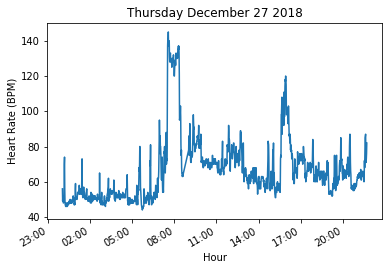

In [169]:
plt.plot(df.time,df.value)
plt.xlabel('Hour')
plt.ylabel('Heart Rate (BPM)')
# beautify the x-labels
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.title(df.time.iloc[0].day_name()+' '+df.time.iloc[0].month_name()+' '+str(df.time.iloc[0].day)+
         ' '+str(df.time.iloc[0].year))
plt.show()